In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [116]:
file = pd.read_csv("ca-2008-02.csv", sep=";")

In [117]:
file

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43.960.335/0001-64,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,GASOLINA,02/07/2008,"2,54","2,1444",R$ / litro,BRANCA
1,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43.960.335/0001-64,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,ETANOL,02/07/2008,"1,23","1,0461",R$ / litro,BRANCA
2,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43.960.335/0001-64,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,DIESEL,02/07/2008,"2,01","1,8682",R$ / litro,BRANCA
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,01/07/2008,"2,497",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,01/07/2008,"1,249",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678552,NE,BA,LIVRAMENTO DE NOSSA SENHORA,JORGE TRINDADE DE OLIVEIRA,04.512.720/0001-97,PRACA BOM JESUS,55,NaN,CENTRO,46140-000,DIESEL,31/12/2008,"2,1","1,884",R$ / litro,BRANCA
678553,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,GASOLINA,31/12/2008,"2,73","2,2768",R$ / litro,PETROBAHIA
678554,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,ETANOL,31/12/2008,"1,8","1,4525",R$ / litro,PETROBAHIA
678555,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,31/12/2008,"2,12","1,9809",R$ / litro,PETROBAHIA


In [118]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678557 entries, 0 to 678556
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     678557 non-null  object
 1   Estado - Sigla     678557 non-null  object
 2   Municipio          678557 non-null  object
 3   Revenda            678557 non-null  object
 4   CNPJ da Revenda    678557 non-null  object
 5   Nome da Rua        678557 non-null  object
 6   Numero Rua         678218 non-null  object
 7   Complemento        182928 non-null  object
 8   Bairro             676311 non-null  object
 9   Cep                678557 non-null  object
 10  Produto            678557 non-null  object
 11  Data da Coleta     678557 non-null  object
 12  Valor de Venda     678557 non-null  object
 13  Valor de Compra    395809 non-null  object
 14  Unidade de Medida  678557 non-null  object
 15  Bandeira           678557 non-null  object
dtypes: object(16)
memory

In [119]:
file["Valor de Venda"] = file["Valor de Venda"].str.replace(',', '.').astype(float)
file["Valor de Compra"] = file["Valor de Compra"].str.replace(',', '.').astype(float)
file["CNPJ da Revenda"] = file["CNPJ da Revenda"].str.replace('[./-]', '', regex=True).astype(int)

In [120]:
file

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43960335000164,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,GASOLINA,02/07/2008,2.540,2.1444,R$ / litro,BRANCA
1,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43960335000164,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,ETANOL,02/07/2008,1.230,1.0461,R$ / litro,BRANCA
2,SE,SP,ARARAQUARA,RAIZEN ARARAQUARA ACUCAR E ALCOOL LTDA,43960335000164,RODOVIA FRANCISCO JOSE ZANIN,Km 4,NaN,ZONA RURAL,14801-970,DIESEL,02/07/2008,2.010,1.8682,R$ / litro,BRANCA
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49051667000102,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,01/07/2008,2.497,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49051667000102,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,01/07/2008,1.249,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678552,NE,BA,LIVRAMENTO DE NOSSA SENHORA,JORGE TRINDADE DE OLIVEIRA,4512720000197,PRACA BOM JESUS,55,NaN,CENTRO,46140-000,DIESEL,31/12/2008,2.100,1.8840,R$ / litro,BRANCA
678553,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,2253236000165,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,GASOLINA,31/12/2008,2.730,2.2768,R$ / litro,PETROBAHIA
678554,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,2253236000165,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,ETANOL,31/12/2008,1.800,1.4525,R$ / litro,PETROBAHIA
678555,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,2253236000165,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,31/12/2008,2.120,1.9809,R$ / litro,PETROBAHIA


In [121]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678557 entries, 0 to 678556
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     678557 non-null  object 
 1   Estado - Sigla     678557 non-null  object 
 2   Municipio          678557 non-null  object 
 3   Revenda            678557 non-null  object 
 4   CNPJ da Revenda    678557 non-null  int64  
 5   Nome da Rua        678557 non-null  object 
 6   Numero Rua         678218 non-null  object 
 7   Complemento        182928 non-null  object 
 8   Bairro             676311 non-null  object 
 9   Cep                678557 non-null  object 
 10  Produto            678557 non-null  object 
 11  Data da Coleta     678557 non-null  object 
 12  Valor de Venda     678557 non-null  float64
 13  Valor de Compra    395809 non-null  float64
 14  Unidade de Medida  678557 non-null  object 
 15  Bandeira           678557 non-null  object 
dtypes:

In [122]:
columns_drop = ["Nome da Rua", "Numero Rua", "Complemento", "Cep", "Bairro"]
file = file.drop(columns=columns_drop, axis=1)

In [123]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678557 entries, 0 to 678556
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     678557 non-null  object 
 1   Estado - Sigla     678557 non-null  object 
 2   Municipio          678557 non-null  object 
 3   Revenda            678557 non-null  object 
 4   CNPJ da Revenda    678557 non-null  int64  
 5   Produto            678557 non-null  object 
 6   Data da Coleta     678557 non-null  object 
 7   Valor de Venda     678557 non-null  float64
 8   Valor de Compra    395809 non-null  float64
 9   Unidade de Medida  678557 non-null  object 
 10  Bandeira           678557 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 56.9+ MB


In [124]:
sales_by_state = file.groupby('Estado - Sigla')['Produto'].count().reset_index()

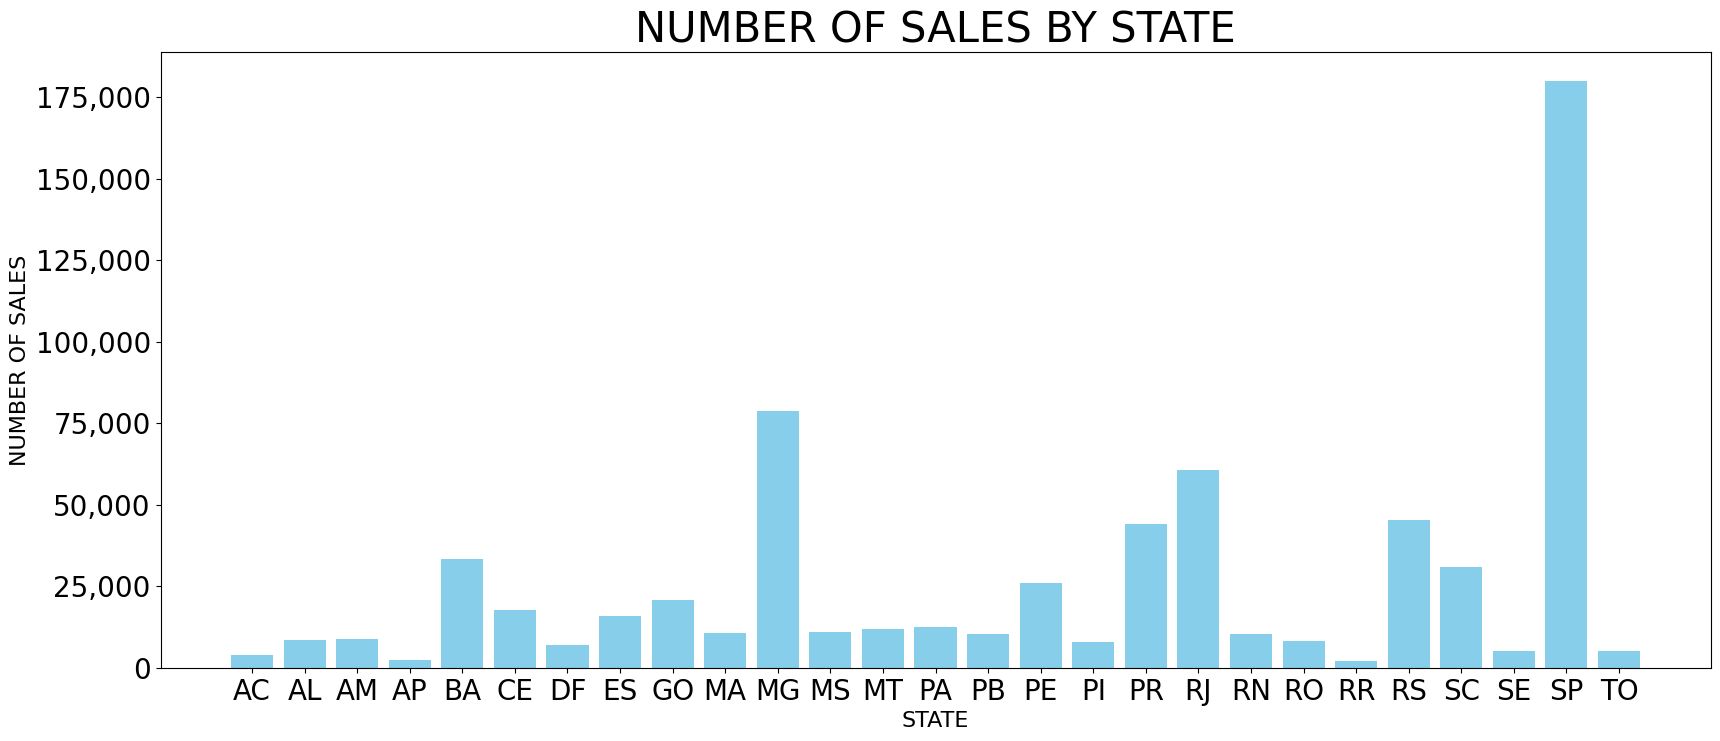

In [125]:
def format_func(value, tick_number):
    return "{:,.0f}".format(value)

plt.figure(figsize=(20, 8))
plt.bar(sales_by_state['Estado - Sigla'], sales_by_state['Produto'], color='skyblue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.title('NUMBER OF SALES BY STATE', fontsize=30)
plt.xlabel('STATE', fontsize=16)
plt.ylabel('NUMBER OF SALES', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [126]:
sales_by_region = file.groupby('Regiao - Sigla')['Produto'].count().reset_index()

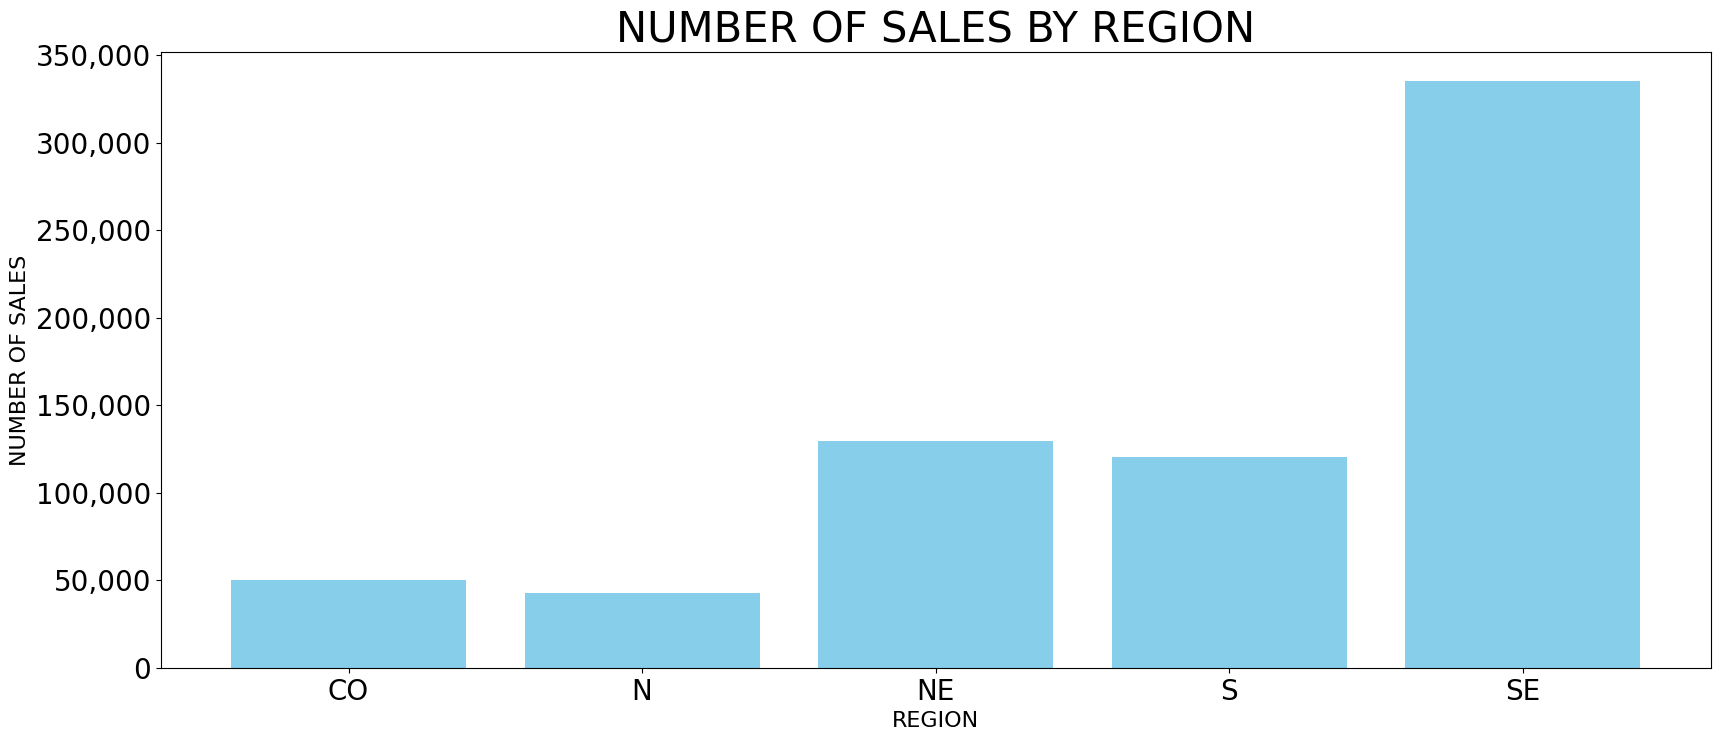

In [127]:
plt.figure(figsize=(20, 8))
plt.bar(sales_by_region['Regiao - Sigla'], sales_by_region['Produto'], color='skyblue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.title('NUMBER OF SALES BY REGION', fontsize=30)
plt.xlabel('REGION', fontsize=16)
plt.ylabel('NUMBER OF SALES', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

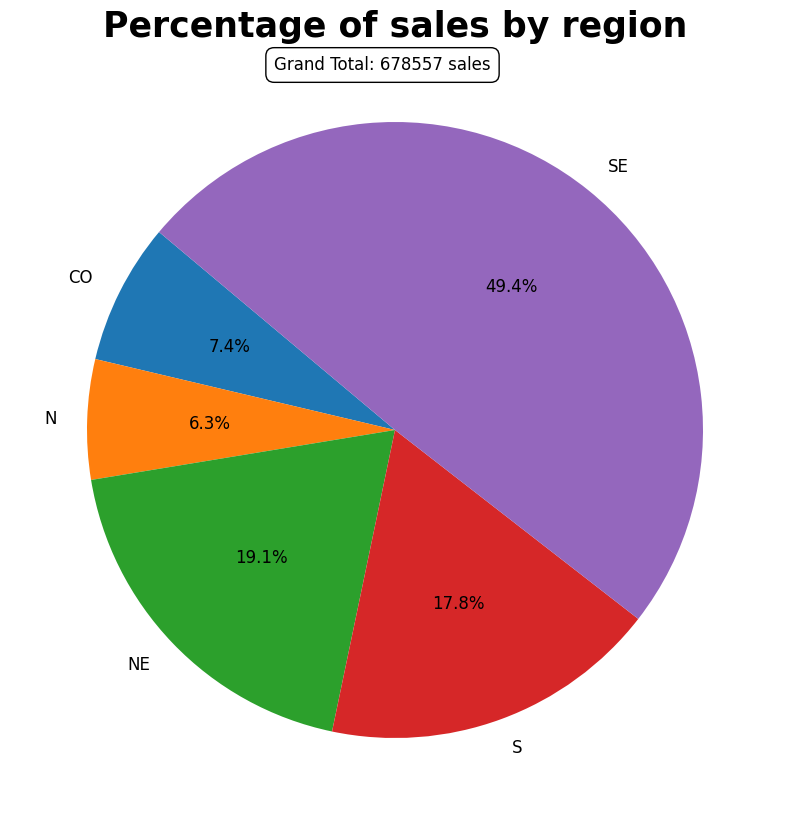

In [137]:
sales_amount = sales_by_region.sum()
plt.figure(figsize=(10, 10))
plt.pie(sales_by_region["Produto"], labels=sales_by_region['Regiao - Sigla'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.title("Percentage of sales by region", fontsize=25, fontweight = 'bold')
total_text = f"Grand Total: {sales_amount['Produto']} sales"
plt.text(0.5, 0.86, total_text, transform=plt.gcf().transFigure, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Exibindo o gráfico
plt.show()